In [ ]:
# Imports

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('data_collection/data/news/tsv/AMZN.tsv', sep='\t')

In [2]:
# Data cleaning

# Remove any sentiment that's not positive, neutral, negative
valid_sentiments = ['positive', 'neutral', 'negative']
df = df[df['sentiment'].isin(valid_sentiments)]

# Sort the dataframe by published_utc
df = df.sort_values(by='published_utc')

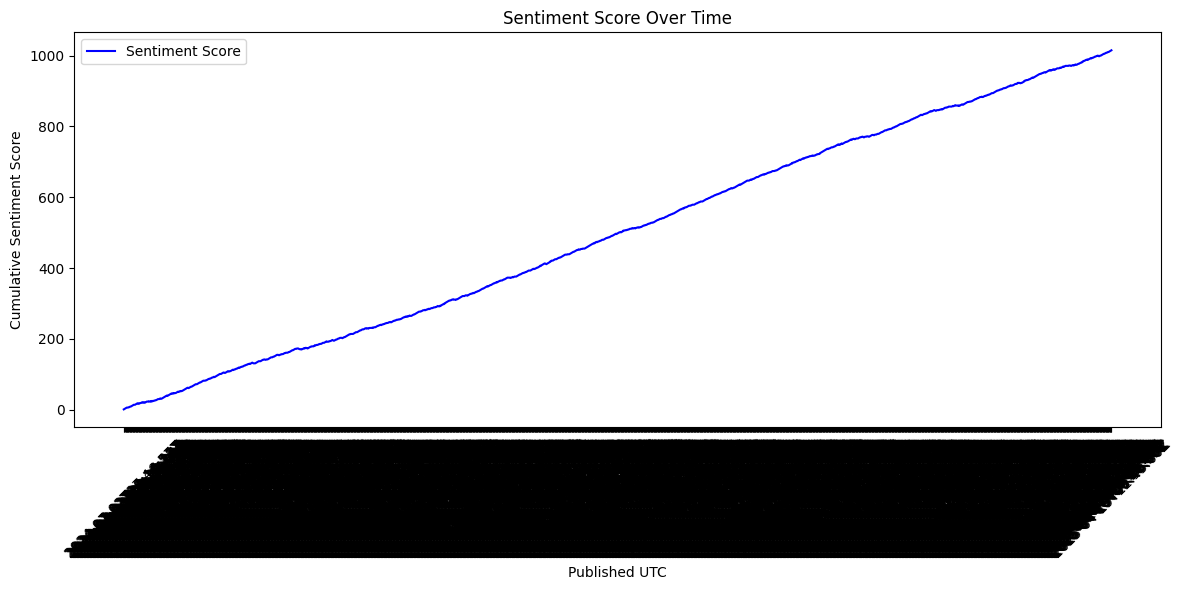

In [3]:
# Visualization

# Initialize naive sentiment score
df['sentiment_score'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else (-1 if x == 'negative' else 0))
df['cumulative_sentiment'] = df['sentiment_score'].cumsum()

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(df['published_utc'], df['cumulative_sentiment'], label='Sentiment Score', color='blue')
plt.xlabel('Published UTC')
plt.ylabel('Cumulative Sentiment Score')
plt.title('Sentiment Score Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

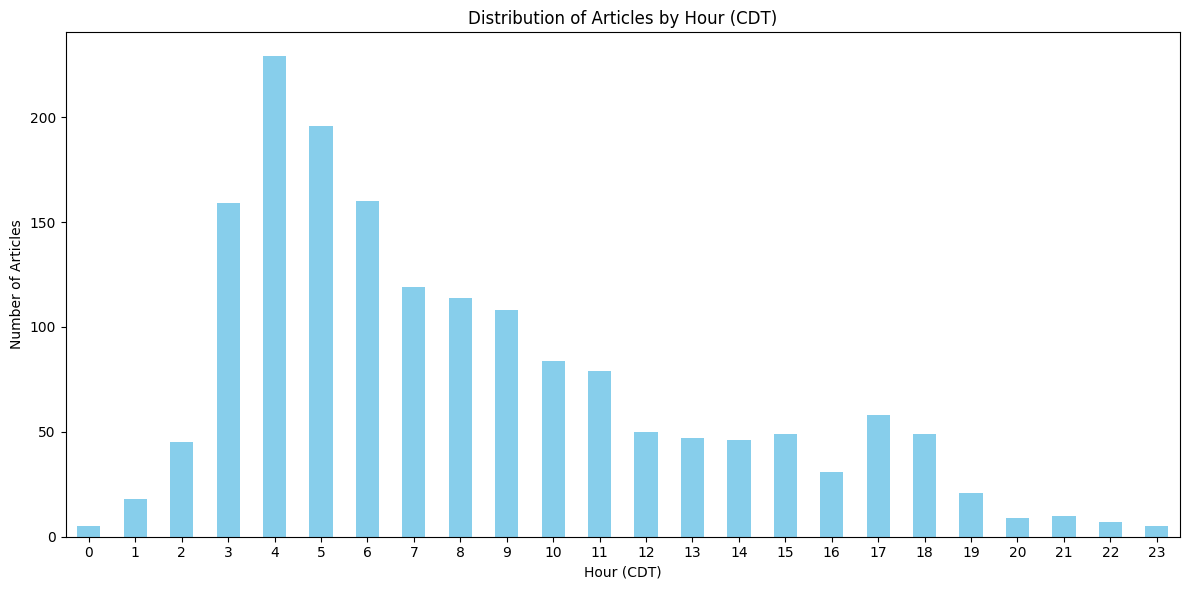

In [ ]:
# Visualization

# Convert 'published_utc' to datetime and adjust to CDT (Central Daylight Time)
df['published_utc'] = pd.to_datetime(df['published_utc'])
df['published_cdt'] = df['published_utc'] - pd.Timedelta(hours=5)  # CDT is UTC-5

# Extract the hour in CDT
df['hour_cdt'] = df['published_cdt'].dt.hour

# Plot the distribution of articles by hour in CDT
plt.figure(figsize=(12, 6))
df['hour_cdt'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour (CDT)')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Hour (CDT)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

,ticker,published_utc,publisher,title,sentiment,sentiment_reasoning,sentiment_score,cumulative_sentiment,hour,published_cdt,hour_cdt
0,AMZN,2024-07-02 17:46:57+00:00,GlobeNewswire Inc.,No-Code AI Platform Market Is Expected To Reac...,positive,AWS is mentioned as one of the biggest names i...,1,1,17,2024-07-02 12:46:57+00:00,12
1,AMZN,2024-07-02 19:16:19+00:00,Benzinga,"Apple, Microsoft, Amazon Shares Soar To New Al...",positive,Investors are starting to understand Amazon's ...,1,2,19,2024-07-02 14:16:19+00:00,14
2,AMZN,2024-07-02 20:14:53+00:00,Benzinga,July Retail Promotions Historically Boost Stoc...,positive,"Amazon, which offers Prime Day sales in mid-Ju...",1,3,20,2024-07-02 15:14:53+00:00,15
3,AMZN,2024-07-02 20:15:43+00:00,Benzinga,"Nasdaq 100 Notches Record Daily Close, Boosted...",positive,Amazon's stock price reached a fresh all-time ...,1,4,20,2024-07-02 15:15:43+00:00,15
4,AMZN,2024-07-02 20:38:27+00:00,Investing.com,Stifel: Retail giants' accelerating control of...,positive,Amazon has been responsible for 11% of US groc...,1,5,20,2024-07-02 15:38:27+00:00,15
...,...,...,...,...,...,...,...,...,...,...,...
1700,AMZN,2025-04-18 10:11:00+00:00,The Motley Fool,5 Warren Buffett Stocks You Can Buy Right Now ...,positive,Amazon is one of the Berkshire Hathaway stocks...,1,1011,10,2025-04-18 05:11:00+00:00,5
1701,AMZN,2025-04-18 11:45:00+00:00,The Motley Fool,The Best Warren Buffett Stocks to Buy With $60...,positive,The article highlights Amazon's AWS division a...,1,1012,11,2025-04-18 06:45:00+00:00,6
1702,AMZN,2025-04-19 08:46:55+00:00,Benzinga,Italy Joins US To Oppose 'Discriminatory' Digi...,positive,The article indicates that Italy's stance agai...,1,1013,8,2025-04-19 03:46:55+00:00,3
1703,AMZN,2025-04-19 09:10:00+00:00,The Motley Fool,Could Buying Nu Holdings Stock Today Set You U...,positive,The article draws a comparison between Nu Hold...,1,1014,9,2025-04-19 04:10:00+00:00,4
